
# Trabalho 1

Para esse trabalho foi solicitado que o grupo faça uma análise dos dados referentes ao alunos da UFV. Para isso o grupo formulou 10 perguntas para ajudar a guiar na análise e entendimento dos dados. 

In [ ]:
# biblioteca para ler os arquivos .ods
!pip install pandas_ods_reader
!pip install odfpy
import pandas as pd
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_ods_reader import read_ods

# monta o drive onde esta salvo o arquivo que vai ser lido
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49002 sha256=0c8bfbb58c6a3dcda94168bfa1e41e4374aef10d728519f2e2d5a2acf1244378
  Stored in directory: /root/.cache/pip/wheels/50/09/62/ea2c44e6ffdd067d6c8d3f557af0734a195bd252d6901f23ca
Successfully built ezodf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=52f331719645d2f8548a7a9b0ab42d708f999f53881f9e17352182b7a2c02f1a
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully b

## Os dados

Nessa primeira parte vamos fazer uma pequena análise inicial dos dados, descobrindo quais os dados que estão presentes e o que pode ser útil para nós.

In [ ]:
# cria o dataframe com os dados do arquivo
#df = pd.read_excel('Dados de estudantes da UFV - 2022-12-12 (2).ods')
#df = read_ods('/content/drive/MyDrive/CCF425/Dados de estudantes da UFV - 2022-12-12.ods', 1)
df = read_ods('/content/Dados de estudantes da UFV - 2022-12-12.ods', 1)

print('Informações gerais do dataframe:')
df


Informações gerais do dataframe:


,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271.0,1982.0,M,CAV,1101.0,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0.0,Informação não disponível,0.0
1,29272.0,1982.0,M,CAV,1101.0,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3.0,Informação não disponível,71.2
2,34462.0,1979.0,F,CAV,1101.0,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3.0,Informação não disponível,78.5
3,34468.0,1979.0,F,CAV,1101.0,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20.0,Pardo(a),56.0
4,34470.0,1980.0,F,CAV,1101.0,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1.0,Informação não disponível,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74021,172112.0,1996.0,None,CAV,1153.0,CAV - Bacharelado em Educação Física,None,None,2023/1,0.0,N,Normal ...,Matriculado,0.0,NaN,0.0,Informação não disponível,0.0
74022,172110.0,1995.0,None,CAV,1153.0,CAV - Bacharelado em Educação Física,None,None,2023/1,0.0,N,Normal ...,Matriculado,0.0,NaN,0.0,Informação não disponível,NaN
74023,172113.0,1996.0,None,CAV,1153.0,CAV - Bacharelado em Educação Física,None,None,2023/1,0.0,N,Normal ...,Matriculado,0.0,NaN,0.0,Informação não disponível,NaN
74024,172114.0,1998.0,None,CAV,1153.0,CAV - Bacharelado em Educação Física,None,None,2023/1,0.0,N,Normal ...,Matriculado,0.0,NaN,0.0,Informação não disponível,NaN


In [ ]:
df.info()

Com uma breve análise podemos observar do que os dados se tratam e algumas colunas que podemos considerar importantes para o trabalho. Abaixo vamos descrever sobre as colunas mais importantes para nós:

| Variável         | Descrição     | Valores |
|--------------|-----------|------------|
| Ano_Nascimento      | Ano do nascimento do aluno  |      |
| Sexo      | Sexo do aluno  |   M ou F   |
| Campus      | Campos do aluno  |   CAV, CAF ou CAR   |
| Curso      | Curso do aluno  |      |
| UF_Nascimento      | Estado de nascimento do aluno  |      |
| Municipio_Nascimento      | Cidade de nascimento do aluno  |      |
| Admissao      | Ano de admissao do aluno  |      |
| Saida      | Ano de saida do aluno  |      |
| Situacao_Aluno_Agrupada      | Situacao possivel do aluno  |   Matriculado, Evasao, Concluido   |
| Enem      | Nota do ENEM do aluno  |      |
| Num_Reporvacoes      | Numero de reprovações do aluno  |      |
| Raca      | raça do aluno  |      |
| CRA      | CRA do aluno  |      |

In [ ]:
df.describe()

,Identificador,Ano_Nascimento,Curso_Identificador,Modalidade_Inscrita,ENEM,Num_Reprovacoes,CRA
count,7.402600e+04,73949.000000,74026.000000,68753.000000,39183.000000,74026.000000,74016.000000
mean,4.914848e+06,1990.876442,1427.490963,3.457725,629.164453,4.968444,61.882511
std,1.032870e+07,8.366123,653.483918,3.957373,68.806862,5.946912,24.364191
min,5.471000e+03,1900.000000,1101.000000,0.000000,253.240000,0.000000,0.000000
25%,6.667525e+04,1986.000000,1112.000000,0.000000,587.660000,0.000000,51.400000
50%,1.119175e+05,1992.000000,1127.000000,1.000000,634.580000,3.000000,69.600000
75%,1.622678e+05,1997.000000,1149.000000,9.000000,676.260000,7.000000,79.300000
max,3.001076e+07,2022.000000,3112.000000,9.000000,847.380000,93.000000,100.000000


# Perguntas

# 1 -  Qual é a porcentagem de alunos que evadiram de algum curso?

In [ ]:
count_total = df['Situacao_Aluno_Agrupada'].value_counts().sum()
count_evasao = df['Situacao_Aluno_Agrupada'].value_counts()['Evasão']
percent = (count_evasao * 100) / count_total
percent

38.8039337530057

Um total de 38,8% das pessoas evadiram algum curso na UFV em todo o período analisado.

# 2 - Qual a media do CRA das pessoas que evadiram
 

<ipython-input-38-cdd6a2e2a1cf>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt = dt.groupby("Situacao_Aluno_Agrupada").mean()['CRA'].plot(kind = 'bar',edgecolor='black')


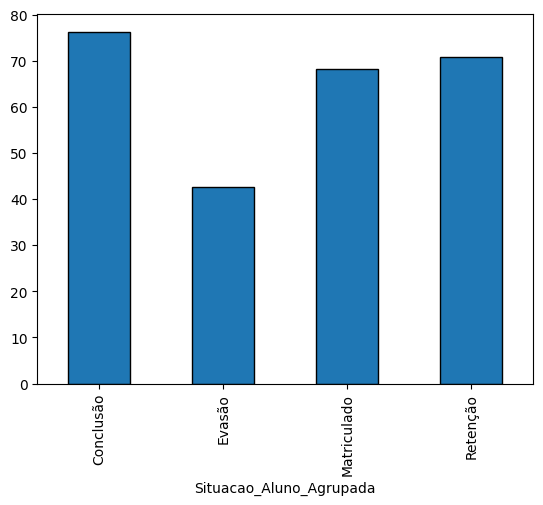

In [ ]:
dt = df
dt['Situacao_Aluno_Agrupada'].value_counts()
dt = dt.groupby("Situacao_Aluno_Agrupada").mean()['CRA'].plot(kind = 'bar',edgecolor='black')

# Ao analisar o gráfico é possível notar que o CRA dos alunos que evadiram é consideravelmente mais baixa que os outros
# Estando abaixo da nota limite para passar em cada matéria, que seria 60, provavelmente também ha uma ligação com a quantidade de reprovações

Ao analisar o gráfico é possível notar que o CRA dos alunos que evadiram é consideravelmente mais baixa que os outros
 Estando abaixo da nota limite para passar em cada matéria, que seria 60, provavelmente também ha uma ligação com a quantidade de reprovações

# 3 - Qual é o gênero dos alunos que mais evadem dos cursos?







Situacao_Aluno_Agrupada  Conclusão    Evasão  Matriculado  Retenção
Sexo                                                               
F                         0.468784  0.341975     0.156405  0.032836
M                         0.379526  0.434513     0.150944  0.035017


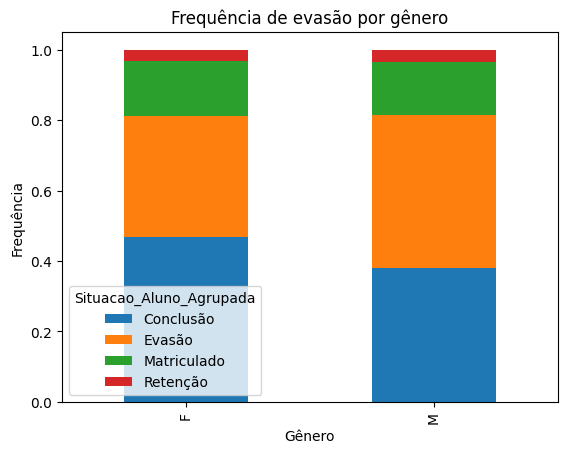

In [ ]:
#Quais são as características mais frequentes dos alunos que evadem da UFV em termos de gênero?


# Calcular frequência de evasão por gênero
freq_evasao_genero = pd.crosstab(index=df['Sexo'], columns=df['Situacao_Aluno_Agrupada'], normalize='index')

# Imprimir resultados
print(freq_evasao_genero)

# Criar gráfico de barras empilhadas
freq_evasao_genero.plot(kind='bar', stacked=True)

# Definir título do gráfico
plt.title('Frequência de evasão por gênero')

# Definir rótulos dos eixos x e y
plt.xlabel('Gênero')
plt.ylabel('Frequência')

# Exibir gráfico
plt.show()


Analisando o gráfico, fica evidente que as alunas apresentam uma taxa de conclusão significativamente maior em comparação aos alunos do sexo masculino. Além disso, observa-se também uma taxa de evasão mais alta entre os alunos. Essas discrepâncias sugerem uma disparidade de gênero no desempenho educacional, com as alunas tendo um desempenho melhor e uma taxa de abandono menor em relação aos alunos.

# 4 - Existem diferenças nas taxas de evasão entre cursos na UFV? Se sim, quais cursos têm as maiores taxas de evasão?

                      

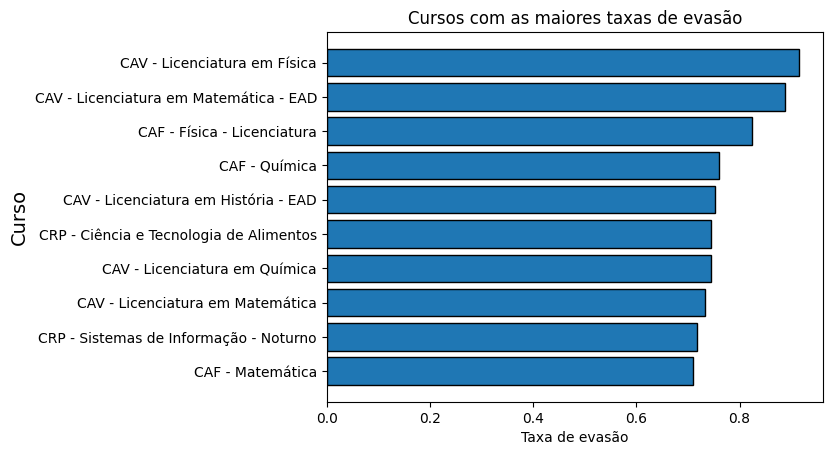

In [ ]:
# Filtrar cursos com todos os alunos evadidos ou concluídos
cursos_filtrados = df.groupby('Curso')['Situacao_Aluno_Agrupada'].apply(lambda x: set(x))
cursos_filtrados = cursos_filtrados[cursos_filtrados.apply(lambda x: len(x) > 1)].index

# Filtrar o dataframe pelos cursos selecionados
df_filtrado = df[df['Curso'].isin(cursos_filtrados)]

# Calcular a taxa de evasão para cada curso
taxa_evasao_por_curso = df_filtrado.groupby('Curso')['Situacao_Aluno_Agrupada'].apply(lambda x: (x == 'Evasão').mean())

# Ordenar os cursos pela taxa de evasão
taxa_evasao_por_curso = taxa_evasao_por_curso.sort_values(ascending=False)

cursos_mais_evasao = taxa_evasao_por_curso.head(10)

# Limitar o número de caracteres do nome do curso a 40
cursos_mais_evasao.index = ['\n'.join(textwrap.wrap(nome, width=40)) for nome in cursos_mais_evasao.index]

# Mapear sinônimos para um nome padrão
sinonimos = {
    "CAF - Física": "CAF - Física - Licenciatura",
}
cursos_mais_evasao.index = [sinonimos.get(nome, nome) for nome in cursos_mais_evasao.index]

# Criar gráfico de barras horizontais
plt.barh(cursos_mais_evasao.index, cursos_mais_evasao.values,edgecolor='black')

# Definir título do gráfico
plt.title('Cursos com as maiores taxas de evasão')

# Definir rótulos dos eixos x e y
plt.xlabel('Taxa de evasão')
plt.ylabel('Curso', fontsize=14)

# Inverter a ordem dos cursos no eixo y
plt.gca().invert_yaxis()

# Exibir gráfico
plt.show()


Sim, existem diferenças nas taxas de evasão entre os cursos na UFV. Ao analisar o gráfico, é possível identificar alguns cursos com índices mais altos de evasão. Entre esses cursos, destacam-se:

* CAV - Licenciatura em Física
* CAV - Licenciatura em Matemática - EAD
* CAF - Física
* CAF - Química
* CAV - Licenciatura em História - EAD
* CRP - Ciência e Tecnologia de Alimentos
* CAV - Licenciatura em Química
* CAV - Licenciatura em Matemática
* CRP - Sistemas de Informação - Noturno
* CAF - Matemática

Esses cursos apresentam índices mais elevados de evasão, indicando que os alunos podem estar enfrentando desafios ou dificuldades específicas nesses cursos. 

#5 - Quantas Pessoas Evadiram por estado?

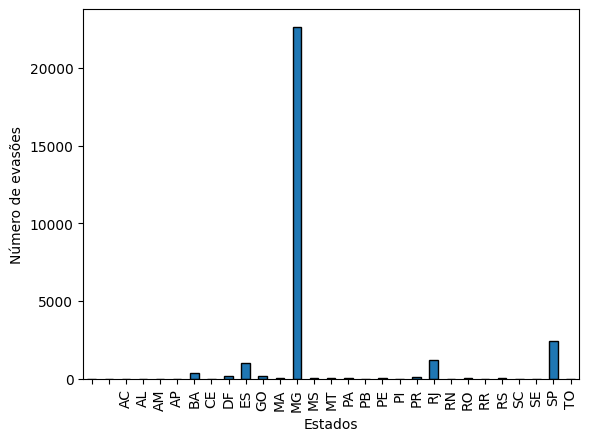

In [ ]:
df_evadidos = df[df['Situacao_Aluno_Agrupada'] == 'Evasão']
evadidos_by_uf = df_evadidos.groupby('UF_Nascimento').count()
evadidos_by_uf['Situacao_Aluno_Agrupada'].plot(kind="bar",edgecolor='black')
plt.xlabel('Estados')
plt.ylabel('Número de evasões')
plt.show()

Ao analisar o gráfico acima, observamos que Minas Gerais apresentou a maior taxa de evasão.



# 6 - Os alunos com nota mais alta no ENEM têm um CRA mais alto do que os alunos com nota mais baixa no ENEM?



<Axes: xlabel='ENEM', ylabel='CRA'>

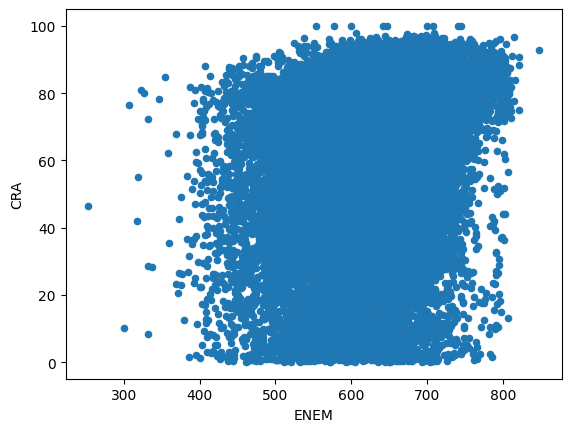

In [ ]:
enem_cra.plot( kind = 'scatter', x = 'ENEM', y = 'CRA')

Usando o mesmo gráfico da questão 1, podemos observer que a distribuição dos dados é homogênea, ou seja, quem tem nota mais alta no ENEM não podemos dizer que terá um CRA melhor. Precisaríamos de outras informações para dizer isso.

# 7 - Os alunos que evadiram tinham mais reprovações do que os que não evadiram?

<ipython-input-39-c159e78e0681>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrup_by_sit = df.groupby('Situacao_Aluno_Agrupada').sum()


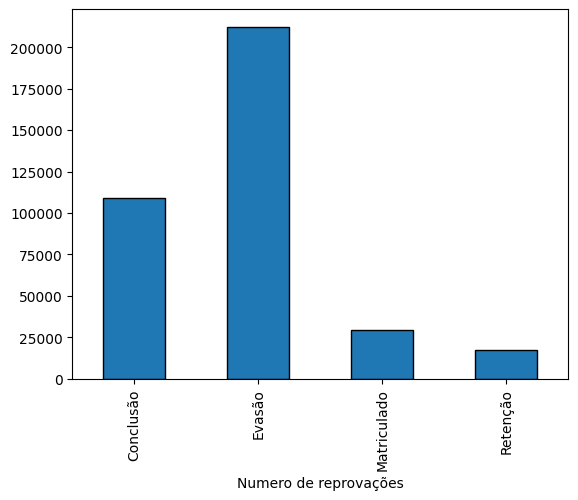

In [ ]:
# Calcular frequência de evasão por gênero
agrup_by_sit = df.groupby('Situacao_Aluno_Agrupada').sum()
agrup_by_sit['Num_Reprovacoes'].plot(kind="bar",edgecolor='black')
plt.xlabel('Numero de reprovações')
plt.show()

#8 - Qual é a distribuição das notas do ENEM entre os alunos que evadiram?

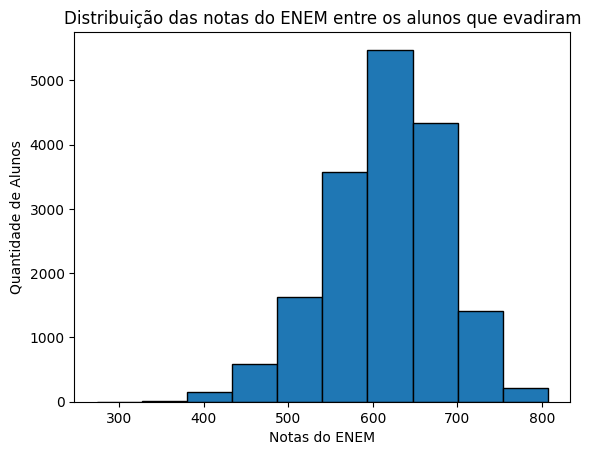

In [ ]:
# Filtrar os alunos que evadiram
alunos_evasao = df[df['Situacao_Aluno_Agrupada'] == 'Evasão']

# Plotar histograma das notas do ENEM dos alunos que evadiram
plt.hist(alunos_evasao['ENEM'], bins=10, edgecolor='black')

# Configurar o título e os rótulos dos eixos
plt.title('Distribuição das notas do ENEM entre os alunos que evadiram')
plt.xlabel('Notas do ENEM')
plt.ylabel('Quantidade de Alunos')

# Exibir o histograma
plt.show()

#9 - Existe alguma relação entre a modalidade de inscrição dos alunos e a probabilidade de evasão?

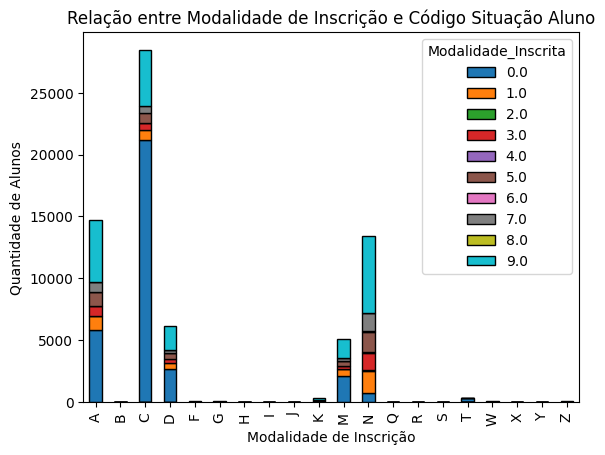

In [ ]:
# Carregar os dados em um DataFrame
data = df[['Modalidade_Inscrita','Codigo_Situacao_Aluno']]
    
datadf = pd.DataFrame(data)

# Contar a quantidade de alunos em cada combinação de modalidade de inscrição e código de situação
counts = datadf.groupby(['Codigo_Situacao_Aluno', 'Modalidade_Inscrita']).size().unstack()

# Plotar o gráfico de barras
counts.plot(kind='bar', stacked=True,edgecolor='black')

# Configurar o título e os rótulos dos eixos
plt.title('Relação entre Modalidade de Inscrição e Código Situação Aluno')
plt.xlabel('Modalidade de Inscrição')
plt.ylabel('Quantidade de Alunos')

# Exibir o gráfico
plt.show()

# 10 - Qual é a média do CRA dos alunos que permaneceram no curso até a conclusão?



76.38040146566831


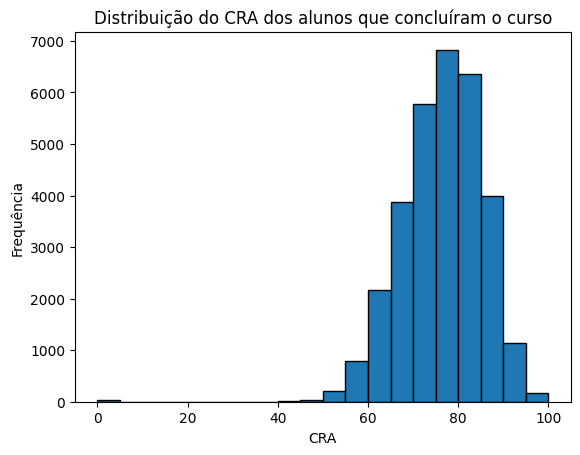

In [ ]:
# Qual é a média do CRA dos alunos que permaneceram no curso até a conclusão?

# Filtrar apenas os alunos que concluíram o curso e não têm valores faltantes em CRA
alunos_conclusao = df[(df['Situacao_Aluno_Agrupada'] == 'Conclusão') & (df['CRA'].notna())]

# Calcular a média do CRA dos alunos que concluíram o curso
media_cra_conclusao = alunos_conclusao['CRA'].mean()


# Imprimir a média do CRA
print((media_cra_conclusao))

#Filtrar apenas os alunos que concluíram o curso e não têm valores faltantes em CRA
alunos_conclusao = df[(df['Situacao_Aluno_Agrupada'] == 'Conclusão') & (df['CRA'].notna())]

# Gerar histograma de CRA dos alunos que concluíram o curso
plt.hist(alunos_conclusao['CRA'], bins=20,edgecolor='black')

# Definir título do gráfico
plt.title('Distribuição do CRA dos alunos que concluíram o curso')

# Definir rótulos dos eixos x e y
plt.xlabel('CRA')
plt.ylabel('Frequência')

# Exibir gráfico
plt.show()



Ao analisar o gráfico, observamos que a distribuição do CRA (Coeficiente de Rendimento Acadêmico) dos alunos que permaneceram no curso até a conclusão está concentrada principalmente entre 70 e 80. Com base nessa distribuição, podemos afirmar que a média do CRA dos alunos é de 76,38.